In [194]:
import numpy as np
from timeit import Timer



In [195]:
# Example of speeding processes

input_vector = np.random.rand(1_000_000)
output_vector = np.random.rand(1_000_000)

bias = 9

def np_dot():
    result = np.dot(input_vector, output_vector) + bias
    return result

time_compiling = Timer(np_dot).timeit(1)

print("Time compiling_ %0.9f" % time_compiling)


Time compiling_ 0.004708900


In [196]:
# Demonstration of implementing speed-process

import numpy as np
import tensorflow as tf
import math
from timeit import Timer
from functools import lru_cache
import matplotlib.pyplot as plt


In [206]:
tf_optimizer, optimizer_value = tf.keras.optimizers.Adam, 1.0
input_units, input_shape = 15, (1,)

dropout_value = 0.5

layer_hide_1 = tf.keras.layers.Dense(units=input_units, input_shape=input_shape)
layer_hide_2 = tf.keras.layers.Dense(units=input_units)
output_layer = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([
    layer_hide_1, layer_hide_2, output_layer,
    tf.keras.layers.Dropout(dropout_value),
])
model.compile(
    optimizer=tf_optimizer(optimizer_value),
    loss="mean_squared_error"
)

def predict_result(array_x, array_y, rounds, input_data):
    history_ = model.fit(array_x, array_y, epochs=rounds, verbose=False)
    result = model.predict(input_data)
    return (history_.history["loss"], result)


C:\Users\mirfe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [219]:
input_data = np.array([16.0])

input_train = np.random.rand(15)
output_train = np.random.rand(15)

model_rounds = 60

def predicted_result():
    loss, result = predict_result(
        input_train, output_train, model_rounds, input_data
    )
    return (loss, result[0])
    
time_compiling = Timer(predicted_result).timeit(1)
loss, result = predicted_result()

print("Warning: Output result may be rounded")
print(result, "Time of compiling: %0.9f" % time_compiling, sep="\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[-0.4683299]
Time of compiling: 3.751449800


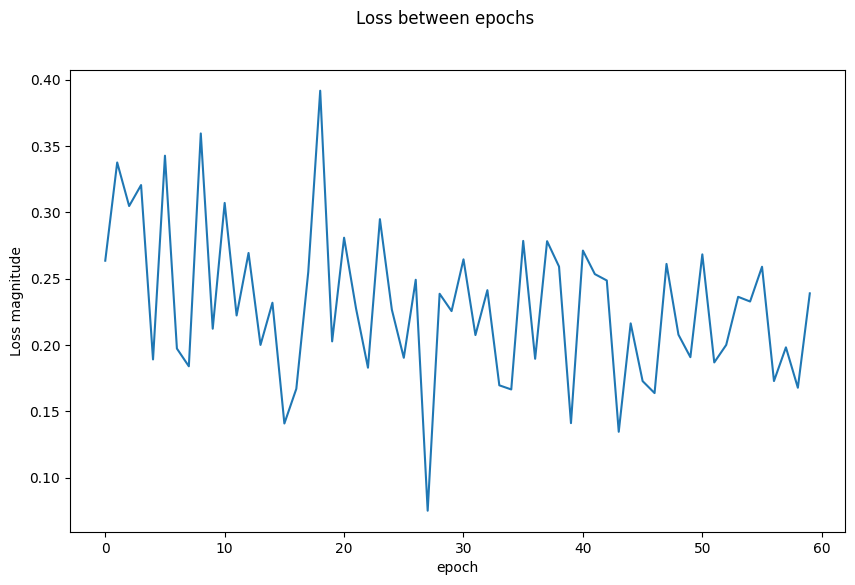

In [221]:
plt.figure(figsize=(10, 6))
plt.suptitle("Loss between epochs")
plt.xlabel("epoch")
plt.ylabel("Loss magnitude")
plt.plot(loss)
plt.show()